In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from __future__ import division

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
r_g=pd.read_csv("recent-grads.csv")

# This dataset contains data about the recent graduates.
# We will explore the data to anwers the foll questions:  

   1)How many majors make more than 70000  
   2)How many majors make more than 100000  
   3)What % of students majored in one of those high earning majors      
   4)Do these high earning graduates also have low unemployment rate?  
    
    

In [4]:
r_g.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
r_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Major_category          173 non-null object
Total                   173 non-null int64
Sample_size             173 non-null int64
Men                     173 non-null int64
Women                   173 non-null int64
ShareWomen              173 non-null float64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       172 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs           173 n

In [6]:
top_paying=r_g[r_g['Median']>70000]


In [7]:
top_paying

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


# The three Majors that had salaries above 70,000 were :  

1) Petroleum Engineering  

2) Mining and Mineral Engineering  

3) Metallurgical Engineering  



In [8]:
r_g["Major"][r_g["Median"]>100000]

0    PETROLEUM ENGINEERING
Name: Major, dtype: object

# There was only one major -- Petroleum Engineering that paid above 100,000.


In [9]:
percent_top_pay=(top_paying["Total"].sum()*100)/r_g["Total"].sum()

In [10]:

p=round(percent_top_pay,3)
p

0.058

# Only 0.06% of graduates earned salary above 70,000.


In [11]:
top_unemp_rate=top_paying["Unemployment_rate"].mean()
round(top_unemp_rate,2)

0.05

In [12]:
low_paying=r_g[r_g['Median']<70000]

In [13]:
low_unemp_rate=low_paying["Unemployment_rate"].mean()
round(low_unemp_rate,2)

0.07

# The mean unemployment rate for salaries >70000 is 0.05  
# The mean unemployment rate for salaries <70000 is 0.07  


In [14]:
r_g["nm_total"]=r_g["Total"]/100


In [15]:
r_g.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,nm_total
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,23.39
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,388,85,0.117241,75000,55000,90000,350,257,50,7.56
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,340,16,0.024096,73000,50000,105000,456,176,0,8.56
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,692,40,0.050125,70000,43000,80000,529,102,0,12.58
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,322.60


# What was the sample size of graduates surveyed,that was most commonly taken.


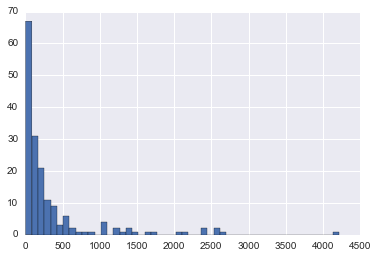

In [21]:
r_g["Sample_size"].hist(bins=50)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

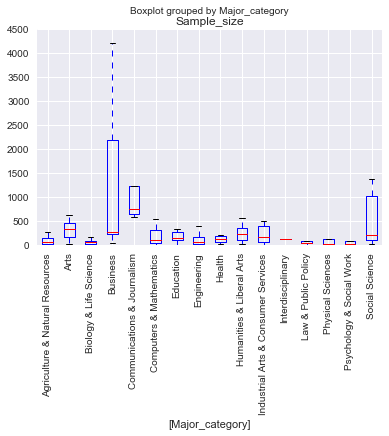

In [22]:
r_g[["Sample_size","Major_category"]].boxplot(by="Major_category")
plt.xticks(rotation=90)

# The sample size was mostly <500 . The above boxplot shows the sample size across various majors.


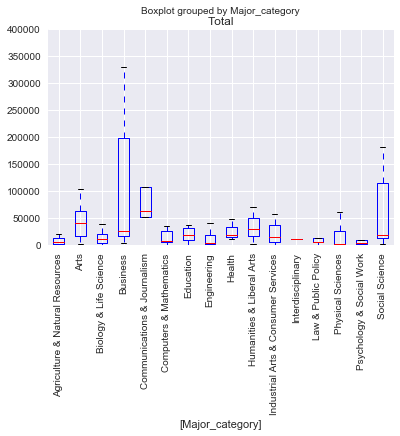

In [23]:
r_g[["Total","Major_category"]].boxplot(by='Major_category')
plt.xticks(rotation=90)
plt.show()

# The sample size seems to be taken on the basis of total graduates in the major_category as the boxplots for "total" and " sample" are similar.